# Mixed Dirichlet/Neumann Cahn-Hilliard

In [1]:
import voxelsss as vox
import numpy as np

Instead of having periodic boundary conditions in all three directions, it is possible to mix Dirichlet or Neumann boundary conditions in the x-direction with periodic boundaries in the y- and z-direction.

In [2]:
Nx, Ny, Nz = [100, 100, 100]
vf = vox.VoxelFields((Nx, Ny, Nz), domain_size=(Nx, Ny, Nz))
noise = 0.5 + 0.1*np.random.rand(Nx, Ny, Nz)
noise[0,:,:] = 0.1
end_time = 100
dt = 0.1

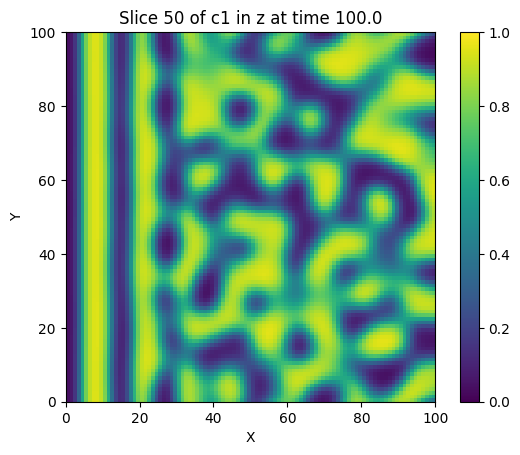

Wall time: 6.3295 s after 1000 iterations (0.0063 s/iter)
GPU-RAM currently allocated 67.10 MB (161.48 MB reserved)
GPU-RAM maximally allocated 134.37 MB (161.48 MB reserved)


In [3]:
from voxelsss.precompiled_solvers.old_solvers_phasefield import MixedCahnHilliardSolver

vf.add_field("c1", noise)
sim = MixedCahnHilliardSolver(vf, 'c1', mode='neumann', device='cuda')
sim.solve(method = 'mixed_FFT', A=0.1, \
          time_increment=dt, frames=10, max_iters=int(end_time/dt), \
          verbose='plot', vtk_out=None, plot_bounds=(0,1))

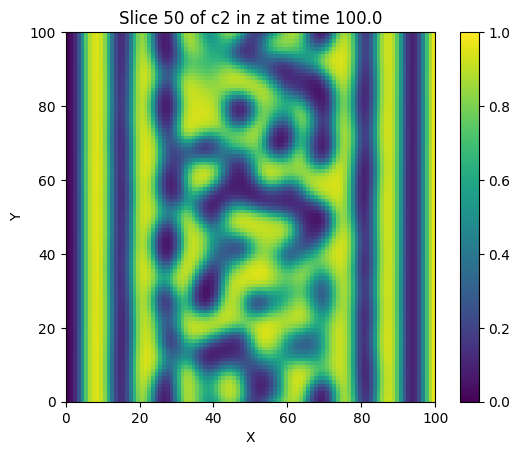

Wall time: 6.1657 s after 1000 iterations (0.0062 s/iter)
GPU-RAM currently allocated 71.75 MB (178.26 MB reserved)
GPU-RAM maximally allocated 138.86 MB (178.26 MB reserved)


In [4]:
vf.add_field("c2", noise)
sim = MixedCahnHilliardSolver(vf, 'c2', mode='dirichlet', device='cuda')
sim.solve(method = 'mixed_FFT', bcs=(0,1), A=0.1, \
          time_increment=dt, frames=10, max_iters=int(end_time/dt), \
          verbose='plot', vtk_out=None, plot_bounds=(0,1))

As discussed in the example notebook for voxelFields, the staggered_x convention shifts all grid points by $\Delta x/2$ such that nodes are actually located on the domain boundary at $x=0$ and $x=L_x$. We therefore increase the number of points in x by one and make sure that the domain size stays the same.

In [5]:
Nx, Ny, Nz = [101, 100, 100]
vf = vox.VoxelFields((Nx, Ny, Nz), domain_size=(Nx-1, Ny, Nz), convention='staggered_x')

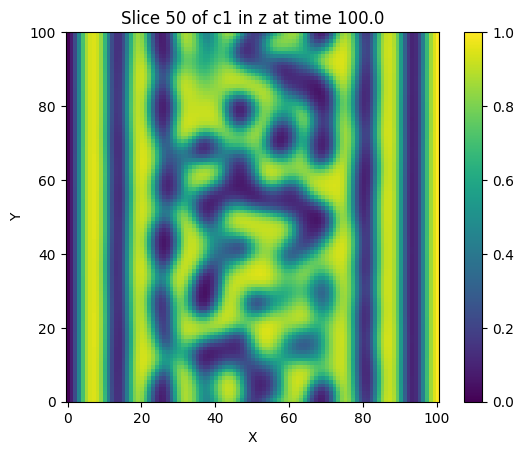

Wall time: 6.7952 s after 1000 iterations (0.0068 s/iter)
GPU-RAM currently allocated 66.61 MB (178.26 MB reserved)
GPU-RAM maximally allocated 143.11 MB (178.26 MB reserved)


In [6]:
vf.add_field("c1", np.concatenate((noise, noise[0:1,:,:]), axis=0))

dt = 0.1
sim = MixedCahnHilliardSolver(vf, 'c1', mode='dirichlet', device='cuda')
sim.solve(method = 'mixed_FFT', bcs=(0,1), A=0.1, \
          time_increment=dt, frames=10, max_iters=int(end_time/dt), \
          verbose='plot', vtk_out=None, plot_bounds=(0,1))